<a href="https://colab.research.google.com/github/YinmiAlas/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
# TODO - your code!
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84 (1).data


In [38]:
column = ['team','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
votes = pd.read_csv('house-votes-84 (1).data', header=None, names=column, na_values='?')
votes.head()

,team,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [39]:
#dropping missing values 
votes.dropna(inplace=True)
votes.head()

,team,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [40]:
print(votes.shape)
votes.tail()

(232, 17)


,team,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
423,democrat,n,y,y,n,n,y,y,y,y,n,y,n,n,y,y,y
426,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
427,republican,n,n,n,y,y,y,y,y,n,y,n,y,y,y,n,y
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y


In [41]:
#replacing Y & N 
votes = votes.replace({'y':1, 'n':0})
votes.head()

,team,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [42]:
#getting the vote data of each team
repu = votes[votes['team']=='republican']
repu.head()

,team,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
28,republican,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1
30,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
33,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
35,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0


In [43]:
demo = votes[votes['team']=='democrat']
demo.head()

,team,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
26,democrat,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1


In [44]:
demo_inter = demo['budget']
demo_inter

5      1
19     1
23     1
25     1
26     1
      ..
421    1
422    1
423    1
426    1
431    1
Name: budget, Length: 124, dtype: int64

In [0]:
#Generate and numerically represent a confidence interval
#in this code im pretending to take the confidence interval 
#n = taking number data size leng
#stderror = standar deviation error 
#moe = marging error 
#ppf = Percent Point Function
#.sqrt() = square
def confi_inter (demo_inter, confidence=0.95):
  #demo_inter = np.array(demo_inter)
  mean = np.mean(demo_inter)
  n = len(demo_inter)
  stderror = np.std(demo_inter, ddof=1)/np.sqrt(n)
  #margin error
  moe = stderror * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - moe, mean + moe)

In [47]:
#Generate and numerically represent a confidence interval
#of democrats['budget']
demo_inter2 = confi_inter(demo_inter)
demo_inter2
# mean, upper bound, lower bound.

(0.8548387096774194, 0.791966749899413, 0.9177106694554258)

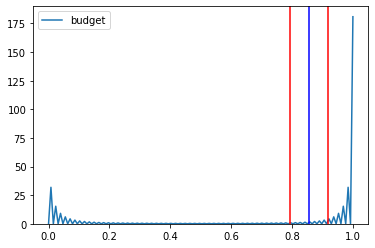

In [63]:
#Graphically (with a plot) represent the confidence interval
sns.kdeplot(demo_inter)
confi_inter2 = demo_inter2
plt.axvline(x=confi_inter2[1], color='red')
plt.axvline(x=confi_inter2[2], color='red')
plt.axvline(x=confi_inter2[0], color='blue');

In [0]:
#Interpret the confidence interval - what does it tell you about the data and its distribution?

'''i aint goint lie but its pretty tough i think i did the code work a lil well but 
im still in the moon understanding  the null hypothesis plus confidence interval 
and this ones too mean, upper bound, lower bound. but i will be google it
i dont feel like if someone ask me ill explain it''' 

In [0]:
#Chi-squared tests:

#Take a dataset that we have used in the past in class that has categorical 
#variables. Pick two of those categorical variables and run a chi-squared tests on that data
#By hand using Numpy
#In a single line using Scipy

In [4]:
adults = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adults.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [8]:
#adding another column with creating binned categories
#that way we can select data and know what range they are.
points = [0, 9, 19, 29, 39, 49, 1000]
labels_n = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
adults['hours_per_week_cat'] = pd.cut(adults['hours-per-week'], points, labels=labels_n)
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [9]:
adults['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [12]:
#adding margins=True with this code you can get the total of each 
#calumn and row
conting_tab = pd.crosstab(adults['race'], adults['hours_per_week_cat'], margins=True)
conting_tab

hours_per_week_cat,0-9,10-19,20-29,30-39,40-49,50+,All
race,,,,,,,
Amer-Indian-Eskimo,6,6,23,37,196,43,311
Asian-Pac-Islander,16,36,80,98,629,180,1039
Black,30,92,265,485,1967,285,3124
Other,3,5,19,49,158,37,271
White,403,1107,2005,2998,15386,5917,27816
All,458,1246,2392,3667,18336,6462,32561


In [13]:
#getting the sum(total) of each row and column wiht .iloc
row_sum = conting_tab.iloc[0:5, 6].values
col_sum = conting_tab.iloc[5, 0:6].values
print(row_sum)
print(col_sum)

[  311  1039  3124   271 27816]
[  458  1246  2392  3667 18336  6462]


In [14]:
#getting the total table of 'race' & 'hours_per_week_cat'
crosstab 
total = conting_tab.loc['All', 'All']
total

32561

In [15]:
adults.shape[0]

32561

In [20]:
#lets get what expected between real data (observed)
#need open to two lists like expect and expect_row 
#need to take range ang len of row_sum(total)
#also need to append values plus converted to array 
#so can work and count rows and columns really well
expect = []
for x in range(len(row_sum)):
  expect_row = []
  for col in col_sum:
    expect_value = col*row_sum[x]/total
    expect_row.append(expect_value)
  expect.append(expect_row)
expect = np.array(expect)
print(expect.shape)
print(expect)


(5, 6)
[[4.37449710e+00 1.19009244e+01 2.28467185e+01 3.50246307e+01
  1.75132705e+02 6.17205246e+01]
 [1.46144774e+01 3.97590369e+01 7.63271398e+01 1.17011548e+02
  5.85089647e+02 2.06198151e+02]
 [4.39418937e+01 1.19544977e+02 2.29495654e+02 3.51822978e+02
  1.75921084e+03 6.19983661e+02]
 [3.81186082e+00 1.03702589e+01 1.99082338e+01 3.05198550e+01
  1.52607598e+02 5.37821934e+01]
 [3.91257271e+02 1.06442480e+03 2.04342225e+03 3.13262099e+03
  1.56639592e+04 5.52031547e+03]]


In [19]:
#need to croostab categories and take values again 
#with the obser list and converted to array
obser = pd.crosstab(adults['race'], adults['hours_per_week_cat']).values
print(obser.shape)
obser

(5, 6)


array([[    6,     6,    23,    37,   196,    43],
       [   16,    36,    80,    98,   629,   180],
       [   30,    92,   265,   485,  1967,   285],
       [    3,     5,    19,    49,   158,    37],
       [  403,  1107,  2005,  2998, 15386,  5917]])

In [21]:
#Chi-Squared Statistic with Numpy
#will work with numpy arrays but not python lists
chi_squared = ((obser - expect)**2/(expect)).sum()
print(f'Chi Squuared: {chi_squared}')

Chi Squuared: 356.00986369023934


In [22]:
# Calculate Degrees of Freedom
dof = (len(row_sum)-1)*(len(col_sum)-1)
print(f'Degrees of Freedom: {dof}')

Degrees of Freedom: 20


In [24]:
#Chi-Squared Statistic using Scipy
chi_squared, p_value, dof, expect = stats.chi2_contingency(obser)
print(f'Chi Squared: {chi_squared}')
print(f'P_Value: {p_value}')
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expect))

Chi Squared: 356.00986369023934
P_Value: 2.5701776234158193e-63
Degrees of Freedom: 20
Expected: 
 [[4.37449710e+00 1.19009244e+01 2.28467185e+01 3.50246307e+01
  1.75132705e+02 6.17205246e+01]
 [1.46144774e+01 3.97590369e+01 7.63271398e+01 1.17011548e+02
  5.85089647e+02 2.06198151e+02]
 [4.39418937e+01 1.19544977e+02 2.29495654e+02 3.51822978e+02
  1.75921084e+03 6.19983661e+02]
 [3.81186082e+00 1.03702589e+01 1.99082338e+01 3.05198550e+01
  1.52607598e+02 5.37821934e+01]
 [3.91257271e+02 1.06442480e+03 2.04342225e+03 3.13262099e+03
  1.56639592e+04 5.52031547e+03]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)